## Projeto 04 - Ténicas de Programação II

**Sobre o dataset**

- Título: Personal Key Indicators of Heart Disease
- Fonte: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

**Variáveis**
- HeartDisease: Os entrevistados que já relataram ter doença cardíaca coronária (DAC) ou infarto do miocárdio (IM).
- BMI: Índice de Massa Corporal (IMC).
- Smoking: Você fumou pelo menos 100 cigarros em toda a sua vida?
- AlcoholDrinking: bebedores pesados ​​(homens adultos que bebem mais de 14 bebidas por semana e mulheres adultas que bebem mais de 7 bebidas por semana
- Stroke: (Já disse ter) (você teve) um derrame?
- PhysicalHealth: Agora, pensando em sua saúde física, que inclui doenças e lesões físicas, por quantos dias nos últimos 30 dias sua saúde física não foi boa? (0-30 dias).
- MentalHealth: Pensando em sua saúde mental, por quantos dias nos últimos 30 dias sua saúde mental não foi boa? (0-30 dias).
- DiffWalking: Você tem sérias dificuldades para caminhar ou subir escadas?
- Sex: Você é homem ou mulher?
- AgeCategory: categoria de idade de quatorze níveis. (então calculou a média)
- Race: valor de raça/etnia imputado.
- Diabetic: (Já disse ter) (você tinha) diabetes?
- PhysicalActivity: Adultos que relataram ter feito atividade física ou exercício nos últimos 30 dias fora do trabalho regular.
- GenHealth: Você diria que em geral sua saúde é...
- SleepTime: Em média, quantas horas de sono você dorme em um período de 24 horas?
- Asthma: (Já disse ter) (você teve) asma?
- KidneyDisease: Não incluindo cálculos renais, infecção da bexiga ou incontinência, você já foi informado de que tinha doença renal?
- SkinCancer: (Já disse ter) (você teve) câncer de pele?

**Perguntas**
1. Quais variáveis mais influenciam doenças do coração?
2. Pessoas que fazem mais exercícios físicos têm menos chances de ter doenças cardíacas ou derrames?

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.graphics.gofplots import qqplot
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100

In [208]:
heartdata = pd.read_csv("./data/heart_2020_cleaned.csv")

In [183]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [184]:
heartdata.head().style.background_gradient(cmap='Greys').hide(axis='index')

HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
No,16.600000,Yes,No,No,3.000000,30.000000,No,Female,55-59,White,Yes,Yes,Very good,5.000000,Yes,No,Yes
No,20.340000,No,No,Yes,0.000000,0.000000,No,Female,80 or older,White,No,Yes,Very good,7.000000,No,No,No
No,26.580000,Yes,No,No,20.000000,30.000000,No,Male,65-69,White,Yes,Yes,Fair,8.000000,Yes,No,No
No,24.210000,No,No,No,0.000000,0.000000,No,Female,75-79,White,No,No,Good,6.000000,No,No,Yes
No,23.710000,No,No,No,28.000000,0.000000,Yes,Female,40-44,White,No,Yes,Very good,8.000000,No,No,No


In [185]:
print('Rows:'+'\033[1m', heartdata.shape[0])
print('\033[0m'+'Columns:'+'\033[1m', heartdata.shape[1])
print('\033[1m'+'Details'+'\033[0m')
heartdata.info();

Rows: 319795
Columns: 18
Details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  

### Showing all columns

In [195]:
# Trocando "Yes" por True e "No" por False
def yes_no_bool(s: str):
    if s == "Yes": return True
    elif s == "No": return False
    else: return s

heartdata = heartdata.applymap(yes_no_bool)
heartdata.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,False,16.60,True,False,False,3.0,30.0,False,Female,57.0,White,True,True,Very good,5.0,True,False,True
1,False,20.34,False,False,True,0.0,0.0,False,Female,80.0,White,False,True,Very good,7.0,False,False,False
2,False,26.58,True,False,False,20.0,30.0,False,Male,67.0,White,True,True,Fair,8.0,True,False,False
3,False,24.21,False,False,False,0.0,0.0,False,Female,77.0,White,False,False,Good,6.0,False,False,True
4,False,23.71,False,False,False,28.0,0.0,True,Female,42.0,White,False,True,Very good,8.0,False,False,False


In [186]:
print("Standard Deviation PhysicalHealth: ", heartdata['PhysicalHealth'].std())
print("Standard Deviation SleepTime: ", heartdata['SleepTime'].std())
print("Standard Deviation MentalHealth: ", heartdata['MentalHealth'].std())

Standard Deviation PhysicalHealth:  7.95085018257456
Standard Deviation SleepTime:  1.4360070609668765
Standard Deviation MentalHealth:  7.955235218946832


In [187]:
print("Minimum BMI: ", heartdata['BMI'].min())
print("Maximum BMI: ", heartdata['BMI'].max())

Minimum BMI:  12.02
Maximum BMI:  94.85


In [189]:
print(Counter(heartdata['HeartDisease']))
print(Counter(heartdata['Smoking']))
print(Counter(heartdata['AlcoholDrinking']))
print(Counter(heartdata['DiffWalking']))
print(Counter(heartdata['Diabetic']))

Counter({'No': 292422, 'Yes': 27373})
Counter({'No': 187887, 'Yes': 131908})
Counter({'No': 298018, 'Yes': 21777})
Counter({'No': 275385, 'Yes': 44410})
Counter({'No': 269653, 'Yes': 40802, 'No, borderline diabetes': 6781, 'Yes (during pregnancy)': 2559})


### Correlation 
##### >> Helps us measure both the direction and strength of the linear relationship between two variables

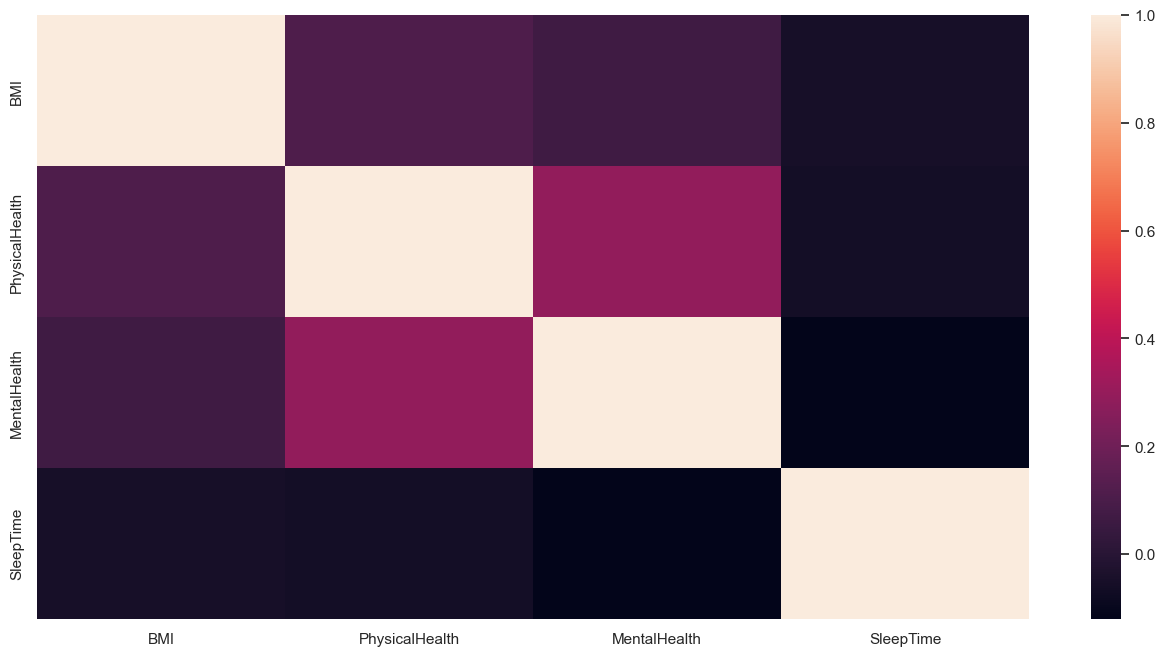

In [190]:
sns.heatmap(heartdata.corr());

In [191]:
age_mapper = {'55-59':57, 
              '80 or older':80, 
              '65-69':67,
              '75-79':77,
              '40-44':42,
              '70-74':72,
              '60-64':62,
              '50-54':52,
              '45-49':47,
              '18-24':21,
              '35-39':37,
              '30-34':32,
              '25-29':27}

#### Replacing feature values with scale

In [192]:
# Replace feature values with scale
heartdata["AgeCategory"] = heartdata["AgeCategory"].replace(age_mapper)
heartdata['AgeCategory'] = heartdata['AgeCategory'].astype('float')


Sex:


Female    167805
Male      151990
Name: Sex, dtype: int64

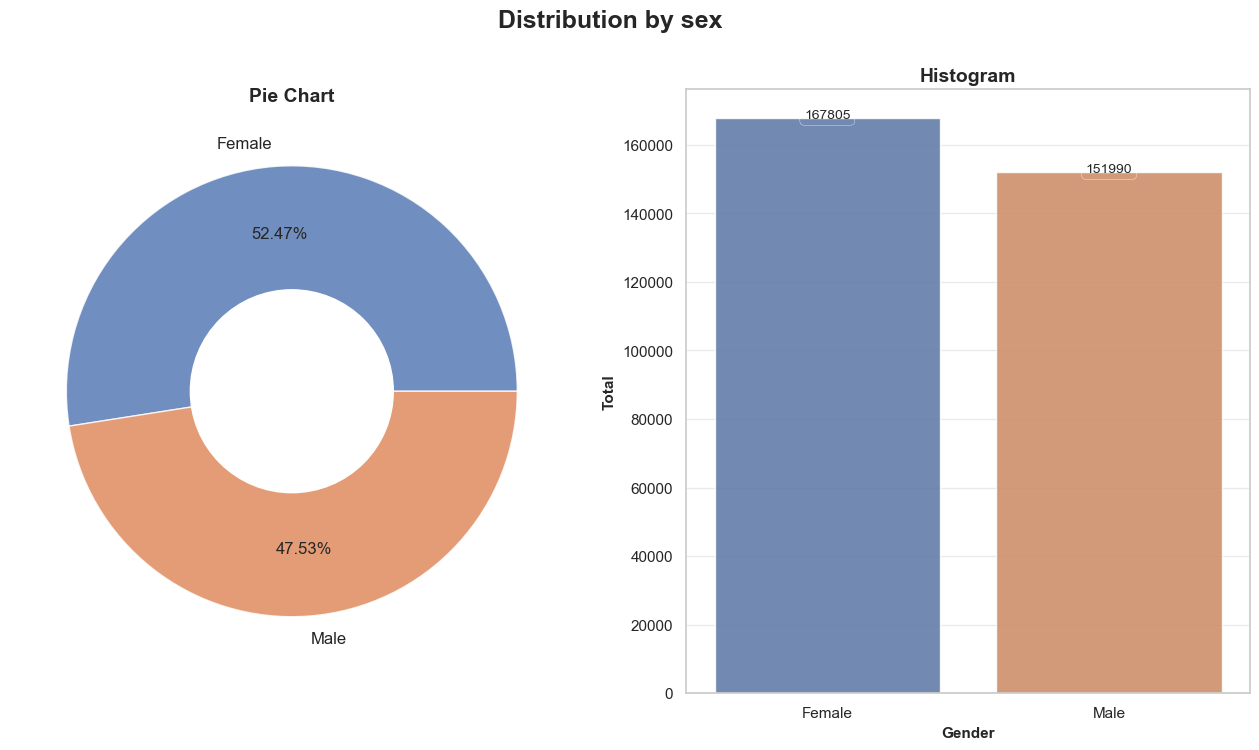

In [193]:
# Setting labels for categorical variables and naming new variable (order)
labels=['Female', 'Male']
order=heartdata['Sex'].value_counts().index

# Size
plt.figure(figsize=(16, 8))
plt.suptitle('Distribution by sex', fontweight='heavy', fontsize='18', fontfamily='sans-serif')

# Pizza Chart
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif')
plt.pie(heartdata['Sex'].value_counts(), labels=labels, pctdistance=0.7, autopct='%.2f%%', wedgeprops=dict(alpha=0.8),textprops={'fontsize':12})
centre = plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

# Histogram
countplot = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif')
ax = sns.countplot(x='Sex', data = heartdata, order=order, alpha=0.85)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, 
            rect.get_height() + 4.25,rect.get_height(), 
            horizontalalignment='center', fontsize=10, 
            bbox=dict(facecolor='none', linewidth=0.25, boxstyle='round'))

plt.xlabel('Gender', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplot

print('\033[1m'+'Sex:'+'\033[0m')
heartdata.Sex.value_counts(dropna=False)

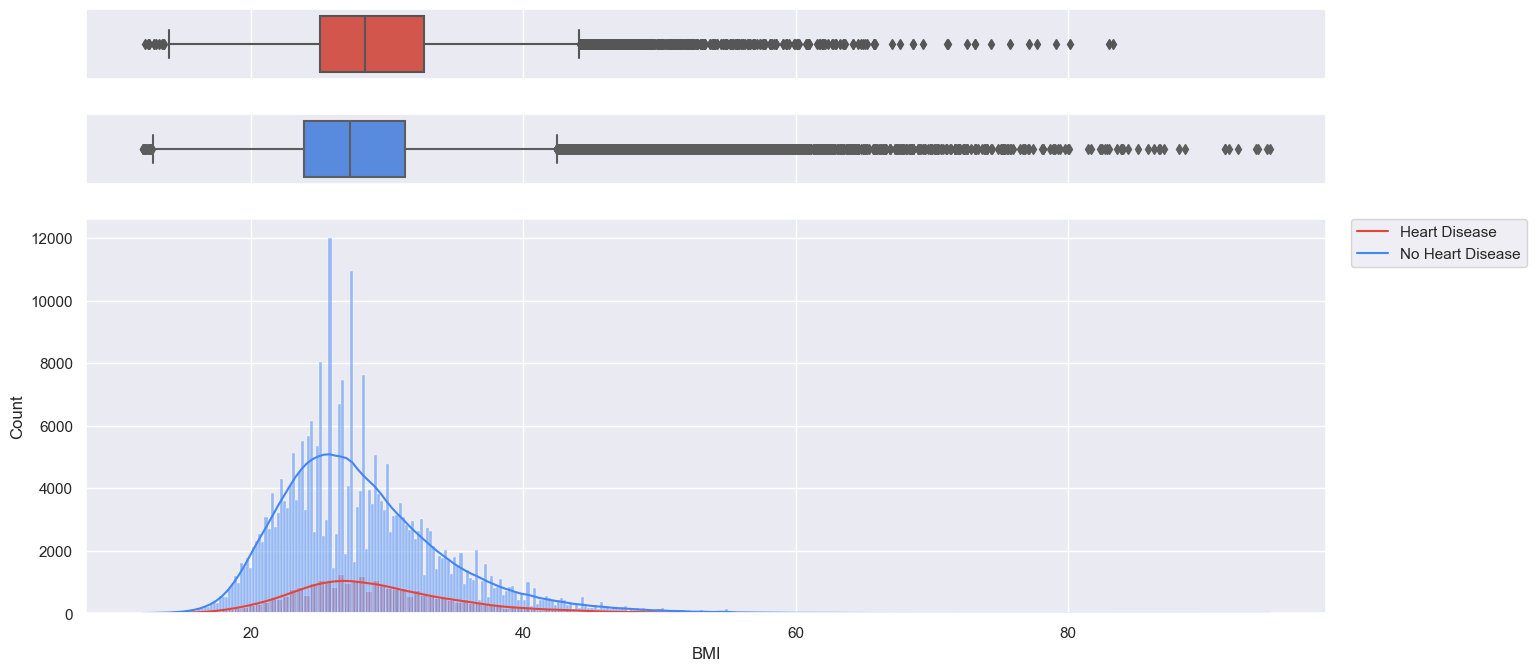

In [198]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(16,8)})

f, (ax_box1, ax_box2, ax_hist) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (.15, .15, .85)})
colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']

sns.boxplot(x=heartdata[heartdata['HeartDisease']]["BMI"], ax=ax_box1, color="#ea4335")
sns.histplot(heartdata[heartdata['HeartDisease']], x="BMI", ax=ax_hist, kde=True, color="#ea4335")

sns.boxplot(x=heartdata[~heartdata['HeartDisease']]["BMI"], ax=ax_box2, color='#4285f4')
sns.histplot(heartdata[~heartdata['HeartDisease']], x="BMI", ax=ax_hist, kde=True, color='#4285f4')
 
ax_box1.set(xlabel='')
ax_box2.set(xlabel='')

plt.legend(title='', loc=2, labels=['Heart Disease', 'No Heart Disease'],bbox_to_anchor=(1.02, 1), borderaxespad=0.)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (14,6))
sns.kdeplot(heartdata[heartdata["HeartDisease"]=='Yes']["AgeCategory"], alpha=1,shade = False, label="HeartDisease", ax = ax)
sns.kdeplot(heartdata[heartdata["SkinCancer"]=='Yes']["AgeCategory"], alpha=1,shade = False, label="SkinCancer", ax = ax)
sns.kdeplot(heartdata[heartdata["KidneyDisease"]=='Yes']["AgeCategory"], alpha=1,shade = False, label="KidneyDisease", ax = ax)

ax.set_xlabel("Age")
ax.set_ylabel("Frequency")
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.show()

In [214]:
heartdata.replace({'Diabetic': {'No, borderline diabetes': 'No'}}, inplace=True)
heartdata.replace({'Diabetic': {'Yes (during pregnancy)': 'Yes'}}, inplace=True)

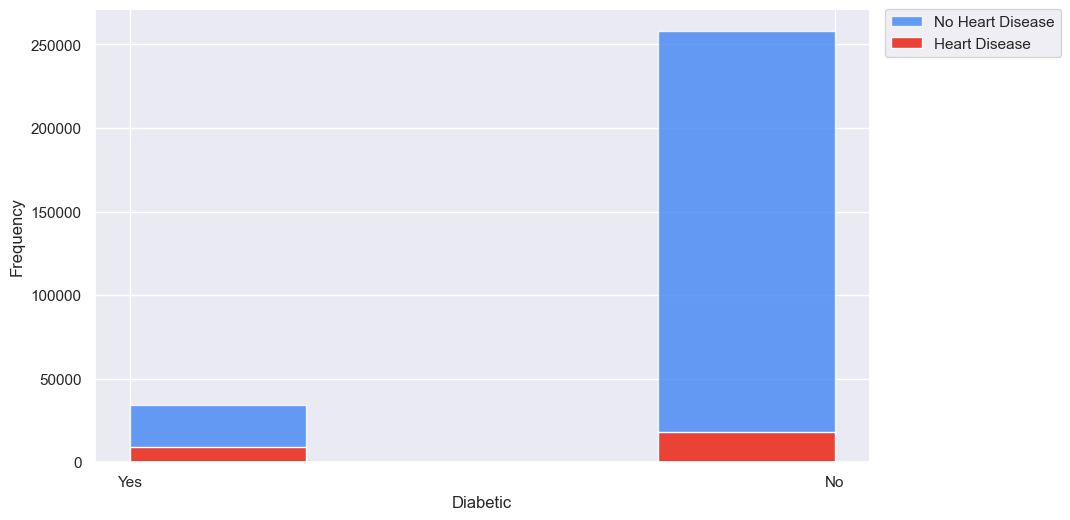

In [219]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heartdata[heartdata["HeartDisease"]=='No']["Diabetic"], bins=4, alpha=0.8, color="#4285f4", label="No Heart Disease")
ax.hist(heartdata[heartdata["HeartDisease"]=='Yes']["Diabetic"], bins=4, alpha=1, color="#ea4335", label="Heart Disease")

ax.set_xlabel("Diabetic")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

### Padronizar frequencias

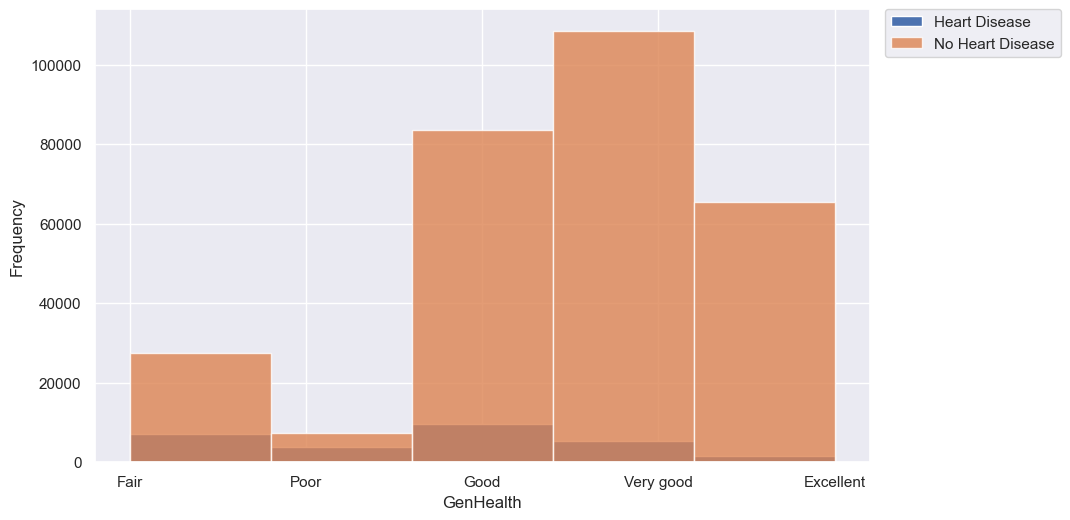

In [221]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist(heartdata[heartdata["HeartDisease"]=='Yes']["GenHealth"], bins=5, alpha=1, label="Heart Disease")
ax.hist(heartdata[heartdata["HeartDisease"]=='No']["GenHealth"], bins=5, alpha=0.8, label="No Heart Disease")

ax.set_xlabel("GenHealth")
ax.set_ylabel("Frequency")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.);
### Padronizar frequencias

In [226]:
fig = make_subplots(
    rows=7, cols=2, subplot_titles=("HeartDisease", "Smoking",
                                    "AlcoholDrinking","Stroke",
                                    "DiffWalking", "Sex",
                                    'Race', 'Diabetic',
                                    'PhysicalActivity','GenHealth',
                                    'Asthma', 'KidneyDisease',
                                    'SkinCancer'),
    specs=[[{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}],
           [{"type": "domain"}, {"type": "domain"}]],
)

colours = ['#4285f4', '#ea4335', '#fbbc05', '#34a853']

fig.add_trace(go.Pie(labels=np.array(heartdata['HeartDisease'].value_counts().index),
                     values=[x for x in heartdata['HeartDisease'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=1, col=1)

fig.add_trace(go.Pie(labels=np.array(heartdata['Smoking'].value_counts().index),
                     values=[x for x in heartdata['Smoking'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=1, col=2)

fig.add_trace(go.Pie(labels=np.array(heartdata['AlcoholDrinking'].value_counts().index),
                     values=[x for x in heartdata['AlcoholDrinking'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=2, col=1)

fig.add_trace(go.Pie(labels=np.array(heartdata['Stroke'].value_counts().index),
                     values=[x for x in heartdata['Stroke'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=2, col=2)

fig.add_trace(go.Pie(labels=np.array(heartdata['DiffWalking'].value_counts().index),
                     values=[x for x in heartdata['DiffWalking'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=3, col=1)

fig.add_trace(go.Pie(labels=np.array(heartdata['Sex'].value_counts().index),
                     values=[x for x in heartdata['Sex'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=3, col=2)

fig.add_trace(go.Pie(labels=np.array(heartdata['Race'].value_counts().index),
                     values=[x for x in heartdata['Race'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=4, col=1)

fig.add_trace(go.Pie(labels=np.array(heartdata['PhysicalActivity'].value_counts().index),
                     values=[x for x in heartdata['PhysicalActivity'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=4, col=2)

fig.add_trace(go.Pie(labels=np.array(heartdata['Diabetic'].value_counts().index),
                     values=[x for x in heartdata['Diabetic'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=5, col=1)

fig.add_trace(go.Pie(labels=np.array(heartdata['GenHealth'].value_counts().index),
                     values=[x for x in heartdata['GenHealth'].value_counts()], hole=.35,
                     textinfo='label+percent', marker_colors=colours),
              row=5, col=2)

fig.add_trace(go.Pie(labels=np.array(heartdata['Asthma'].value_counts().index),
                     values=[x for x in heartdata['Asthma'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=6, col=1)

fig.add_trace(go.Pie(labels=np.array(heartdata['KidneyDisease'].value_counts().index),
                     values=[x for x in heartdata['KidneyDisease'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=6, col=2)

fig.add_trace(go.Pie(labels=np.array(heartdata['SkinCancer'].value_counts().index),
                     values=[x for x in heartdata['SkinCancer'].value_counts()], hole=.35,
                     textinfo='label+percent', rotation=-45, marker_colors=colours),
              row=7, col=1)


fig.update_layout(height=3200, font=dict(size=14), showlegend=False)

fig.show()